<a href="https://colab.research.google.com/github/majidsh97/Project-1/blob/main/audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
z=zipfile.ZipFile("/content/drive/My Drive/data/audio_2gig.zip")
z.extractall("/content/audio/")

In [ ]:
#import zipfile
#z=zipfile.ZipFile("/content/drive/My Drive/data/16class_2gig.zip")
#z.extractall("/content/16class/")

In [ ]:
!cp -a '/content/drive/My Drive/data/_background_noise_/' /content/_background_noise_

In [ ]:
#!cp '/content/drive/My Drive/data/audio.tar.gz' /content/

In [ ]:
#!tar -zxvf audio.tar.gz

In [ ]:
#import shutil
#shutil.make_archive('16class_2gig.zip', 'zip', '/content/16class')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
import librosa
import matplotlib.pyplot as plt
import os
import numpy as np
from random import shuffle
from tensorflow.keras import layers
import datetime
import IPython.display as ipd
from math import ceil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.io.wavfile import read
from scipy.ndimage.interpolation import shift
import IPython
def norm(x):
  mean=np.mean(x,axis=0,keepdims=True,dtype='float32')
  std=np.std(x,axis=0,keepdims=True,dtype='float32')
  tmp =  (x-mean)/std
  return tmp
def getwav(path):
  x = []
  y = []
  for item in path:
      _wav = item[0]
      _y = item[1]
      try:
          _, _x = read(_wav)
      except:
        continue;
      x.append(_x)
      y.append(_y)
  x = pad_sequences(x, sampleRate, 'float32', 'post', 'post')
  x = np.expand_dims(x, 2)
  
  return x, np.array(y)

sampleRate = 16000
#train_path = 'audio/'
classnames = ['cat','dog','left','right','on','off','yes','no']
#batch_size = 32 

total_wav_path = []

for i in range(len(classnames)):
    path_classname = 'audio/' + classnames[i] + "/"
    wav_names = os.listdir(path_classname)
    
    for n in wav_names:
        path_wav = path_classname + n
        total_wav_path.append([path_wav, i])


np.random.shuffle(total_wav_path)
dataset_size = len(total_wav_path)
train_split = int(0.8 * dataset_size)
train_paths = total_wav_path[0:train_split]
val_paths = total_wav_path[train_split:]
xt,yt=getwav(train_paths)
xv,yv=getwav(val_paths)
#xt=norm(xt)
#xv=norm(xv)

FileNotFoundError: ignored

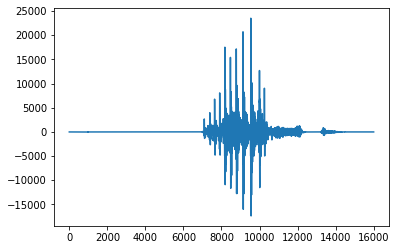

In [ ]:
plt.plot(xt[0,:,0])

In [ ]:
total_wav_path


In [ ]:
#['four', 'dog', 'left', 'right', 'yes', 'forward', 'happy', 'seven']
IPython.display.Audio(filename='audio/right/0f7266cf_nohash_0.wav')

right


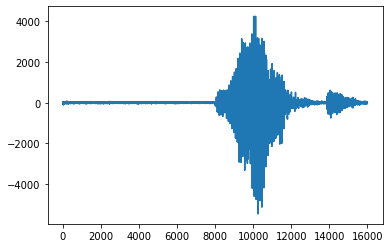

In [ ]:
k=
print(classnames[yv[k]])
IPython.display.Audio(xv[k,:,0],rate=sampleRate)
plt.plot(xv[k,:,0])
plt.savefig('s.jpg')

In [ ]:
IPython.display.Audio(filename='recorded.wav')

In [ ]:
from scipy.signal import resample

_,s=read('recorded.wav')
res=resample(s,16000)
a=s[::5]
print(a.shape)
IPython.display.Audio(res,rate=16000)


(44100,)


(array([    0.,     0.,     0.,     0.,     0., 21408.,     0.,     0.,
            0.,     0.]),
 array([15999.5, 15999.6, 15999.7, 15999.8, 15999.9, 16000. , 16000.1,
        16000.2, 16000.3, 16000.4, 16000.5]),
 <a list of 10 Patch objects>)

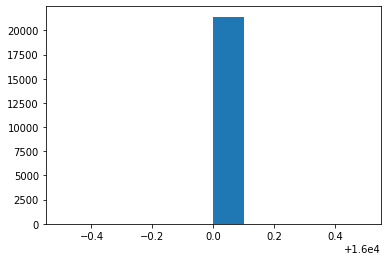

In [ ]:
lxt=[len(x) for x in xt]
plt.hist(lxt)

[1644. 1683. 3037. 3051. 3088. 2997. 3237. 3113.]


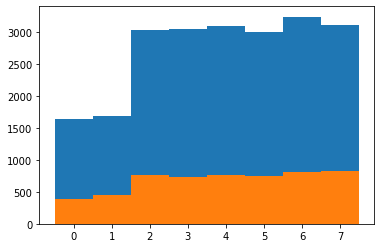

In [ ]:
bins = np.arange(0, yt.max() + 1.5) - 0.5
vals=plt.hist(yt,bins)
plt.hist(yv,bins)
print(vals[0])
plt.savefig('hist.jpg')

In [ ]:
from sklearn.utils import class_weight
class_weight_arr = class_weight.compute_class_weight('balanced'
                                               ,np.unique(yt)
                                               ,yt)
class_weight_dict={i:class_weight_arr[i] for i in range(yt.max()+1)}
class_weight_dict

{0: 1.6613442822384428,
 1: 1.622846108140226,
 2: 0.8993249917681923,
 3: 0.8951982956407735,
 4: 0.8844721502590673,
 5: 0.911327994661328,
 6: 0.8437596540006178,
 7: 0.8773690973337617}

In [ ]:
def myconv(x,fs,ks,st,pd):
  x = layers.Conv1D(fs, ks, st , padding=pd)(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.MaxPooling1D(2)(x)
  return x
ks=15
st=5
fs=64
number_epochs=15
learning_rate=0.003
pd='valid'
input_model = layers.Input((sampleRate, 1))
mask = layers.Masking()(input_model)

x = layers.MaxPooling1D(2)(mask)
#x = layers.ReLU()(x)
x=myconv(x,fs,ks,st,pd)
x=myconv(x,fs,ks,st,pd)
x=myconv(x,fs,ks,st,pd)
#x = layers.GRU(8,return_sequences=True)(x)
x = layers.GRU(16,return_sequences=False)(x)


x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(len(classnames), 'softmax')(x)

model = tf.keras.models.Model(input_model, x)
op = tf.keras.optimizers.Adam(lr=learning_rate)
model.compile(optimizer=op, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['acc'])

tensorpath = "logs/" + datetime.datetime.now().strftime("%y-%m-%d--%H-%M-%S")
tensorboard = tf.keras.callbacks.TensorBoard(tensorpath, histogram_freq=1)
class mycallback(tf.keras.callbacks.Callback):
    def __len__(self):
        pass
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.95 :
            self.model.stop_training = True

stopacc=mycallback()
        

#train_data = mygenerator_v2(train_paths, batch_size, sampleRate, target_size,aug=False)
#val_data = mygenerator_v2(val_paths, batch_size, sampleRate, target_size,aug= False)

model.summary()
print("training data :" + str(train_split) + ",validation data :" + str(dataset_size - train_split))
hist = model.fit(xt,yt, epochs=number_epochs , class_weight=class_weight_dict
                           #, callbacks=[tensorboard,stopacc]
                           , validation_data=(xv,yv) 
                           , shuffle=True
                                           
                           )
model.save('/content/drive/My Drive/data/model/audio.h5')

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 16000, 1)]        0         
_________________________________________________________________
masking_7 (Masking)          (None, 16000, 1)          0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 8000, 1)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 1598, 64)          1024      
_________________________________________________________________
batch_normalization_21 (Batc (None, 1598, 64)          256       
_________________________________________________________________
re_lu_21 (ReLU)              (None, 1598, 64)          0         
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 799, 64)         

In [ ]:
683/683 [==============================] - 6s 9ms/step - loss: 0.2666 - acc: 0.9043 - val_loss: 0.4118 - val_acc: 0.8748

In [ ]:
#train_data = mygenerator_v2(train_paths, batch_size, sampleRate, target_size ,aug= True)
#val_data = mygenerator_v2(val_paths, batch_size, sampleRate, target_size, aug=False)

NameError: ignored

In [ ]:
#model.optimizer=tf.keras.optimizers.Adam(0.001)
#hist = model.fit(train_data, epochs=30, callbacks=[tensorboard], validation_data=val_data, max_queue_size=30,
#                 shuffle=False,initial_epoch=25)


In [ ]:
#model.save('/content/drive/My Drive/data/model/audio.h5')

In [ ]:
"""!zip -r /content/logs.zip /content/logs
from google.colab import files
files.download("/content/logs.zip")"""

In [ ]:
"""! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip"""

In [ ]:
"""LOG_DIR = '/content/logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])""""

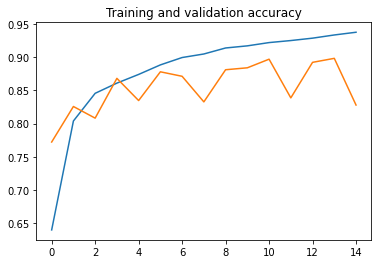

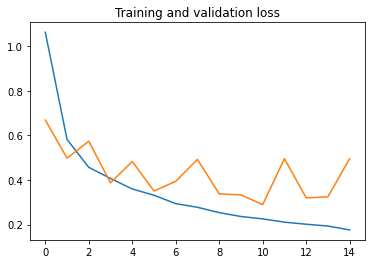

In [ ]:

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
history = hist
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
#plt.figure(figsize=(5,4))
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.savefig('train.jpg')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')
plt.savefig('val.jpg')


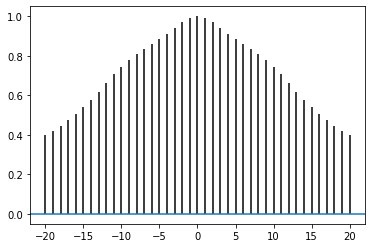

In [ ]:
plt.acorr(xt[20,:,0],maxlags=20)
plt.savefig('data.jpg')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys


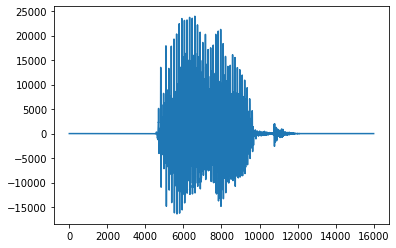

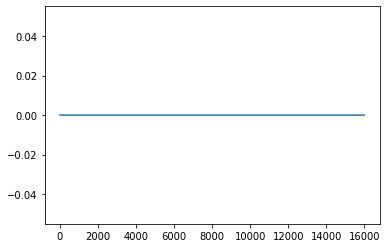

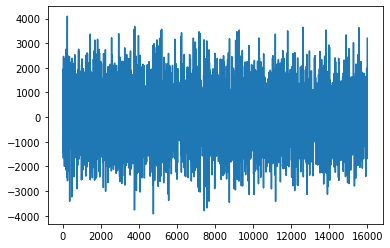

In [ ]:
from scipy.ndimage.interpolation import shift
x=[]
srx , x1 = read("/content/audio/right/0137b3f4_nohash_3.wav")
srx , x2 = read("/content/audio/right/0137b3f4_nohash_0.wav")
x.append(x1)
x.append(x2)
srd , dish = read('/content/audio/_background_noise_/doing_the_dishes.wav')

plt.plot(x[1])
r=np.random.uniform(-0.3,0.3,1)
r=int(r*16000)
x=shift(x,r,cval=0)

plt.figure()
plt.plot(x[1])

r=np.random.uniform(0,93,1)
d=dish[int(r*16000):int((r+1)*16000)]
x=x+d
plt.figure()
plt.plot(x[1])



In [ ]:
k=15
model=tf.keras.models.load_model('/content/drive/My Drive/data/model/audio.h5')
srx , x1 = read(train_paths[k][0])#'audio/'+classnames[0]+'/84bf12ff_nohash_1.wav')
x1=x1[None,:,None]
print(x1.shape)
#x1=norm(x1)

p=model.predict(x1,steps=1)
p=np.argmax(p)
print(p,train_paths[k][1])


(1, 16000, 1)


3 3


In [ ]:
#model.save('audio.tflite')
converter = tf.lite.TFLiteConverter.from_keras_model(model)

#converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
#converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.allow_custom_ops=True
converter.experimental_new_converter =True
tflite_model = converter.convert()



INFO:tensorflow:Assets written to: /tmp/tmpo8f5ja8l/assets


INFO:tensorflow:Assets written to: /tmp/tmpo8f5ja8l/assets


In [ ]:
open("converted_model.tflite", "wb").write(tflite_model)

531744

In [ ]:

#interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter = tf.lite.Interpreter(model_path='converted_model.tflite')

interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
tflite_results = interpreter.get_tensor(output_details[0]['index'])

# Test the TensorFlow model on random input data.
#tf_results = model(tf.constant(input_data))

# Compare the result.
#for tf_result, tflite_result in zip(tf_results, tflite_results):
#  np.testing.assert_almost_equal(tf_result, tflite_result, decimal=5)



In [ ]:
tflite_results

array([[0.1453054 , 0.03180395, 0.05495522, 0.05664356, 0.42066962,
        0.2013803 , 0.02742165, 0.06182026]], dtype=float32)

In [ ]:
k=5
#srx , x1 = read(val_paths[k][0])
srx , x1 = read('audio/'+classnames[1]+'/84bf12ff_nohash_1.wav')
x1=x1[None,:,None].astype('float32')

#x1=norm(x1)


interpreter = tf.lite.Interpreter(model_path='converted_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]['index'], x1)

interpreter.invoke()

p = interpreter.get_tensor(output_details[0]['index'])
p=np.argmax(p)
print(classnames[p],p)

dog 1


In [ ]:
tf.version.GIT_VERSION

In [ ]:
val_paths[k][0]

In [ ]:
from google.colab import files

files.download(val_paths[k][0])

In [ ]:
!pip install sounddevice 
!apt-get install libportaudio2

In [ ]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 44100  # Sample rate
seconds = 3  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output.wav', fs, myrecording)  # Save as WAV file 

In [ ]:
from scipy.io.wavfile import read

srx , x = read("t6.wav")
x


In [ ]:
#m=tf.keras.models.load_model('/content/drive/My Drive/data/model/audio.h5')
m=tf.keras.models.load_model('/content/sample_data/audio.h5')
tf.keras.utils.plot_model(m)
m.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 16000, 1)]        0         
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 1600, 1)           0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 1600, 8)           48        
_________________________________________________________________
batch_normalization_38 (Batc (None, 1600, 8)           32        
_________________________________________________________________
re_lu_38 (ReLU)              (None, 1600, 8)           0         
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 800, 8)            0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 800, 16)           656 